In [96]:
import pandas as pd 
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
# from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


In [97]:
df=pd.read_csv('data\\tweets_sentiment2.csv')
df.head()

,sentiment,tweet
0,1,lying in my hotel bed watching the office
1,0,we are out of the good toothpaste!
2,1,had a good day
3,0,I don't want to wake up @amazingphoebe. but I ...
4,1,"@TerriNixon I have it on too, hoping it will m..."


In [98]:

text_df = df.drop(['sentiment'],axis=1)
text_df.head()

,tweet
0,lying in my hotel bed watching the office
1,we are out of the good toothpaste!
2,had a good day
3,I don't want to wake up @amazingphoebe. but I ...
4,"@TerriNixon I have it on too, hoping it will m..."


In [99]:
print(text_df['tweet'].iloc[0],"\n")
print(text_df['tweet'].iloc[1],"\n")
print(text_df['tweet'].iloc[2],"\n")
print(text_df['tweet'].iloc[3],"\n")
print(text_df['tweet'].iloc[4],"\n")

lying in my hotel bed watching the office  

we are out of the good toothpaste!  

had a good day  

I don't want to wake up @amazingphoebe. but I miss her heaps  

@TerriNixon I have it on too, hoping it will make me laugh  



In [100]:

text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   tweet   100000 non-null  object
dtypes: object(1)
memory usage: 781.4+ KB


In [101]:
from src.logger import logging

In [102]:
def data_processing(tweet):
    tweet = tweet.lower()
    tweet= re.sub(r"https\S+|www\S+https\S+", '',tweet, flags=re.MULTILINE)
    tweet= re.sub(r'\@w+|\#','',tweet)
    tweet= re.sub(r'[^\w\s]','',tweet)
    tweet_tokens = word_tokenize(tweet)
    filtered_text = [w for w in tweet_tokens if not w in stop_words]
    return " ".join(filtered_text)


# text_df['tweet'] = data_processing(text_df['tweet'])

In [106]:
logging.info("Starting ")

In [103]:
text_df['tweet'] = text_df['tweet'].apply(data_processing)
logging.info("Data processing finished successfully.")

In [65]:
text_df = text_df.drop_duplicates('tweet')
logging.info("Duplicate tweet data removed from the dataset.")

In [66]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [67]:
text_df['tweet'] = text_df['tweet'].apply(lambda x: stemming(x))

In [68]:
text_df.head()

,tweet
0,lying hotel bed watching office
1,good toothpaste
2,good day
3,dont want wake amazingphoebe miss heaps
4,terrinixon hoping make laugh


In [69]:
text_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 98967 entries, 0 to 99999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   98967 non-null  object
dtypes: object(1)
memory usage: 1.5+ MB


In [70]:
def polarity(Text):
    return TextBlob(Text).sentiment.polarity

In [71]:
text_df['polarity'] = text_df['tweet'].apply(polarity)
logging.info("Polarity is assigned to data successfully.")

In [72]:
text_df.head(10)

,tweet,polarity
0,lying hotel bed watching office,0.000000
1,good toothpaste,0.700000
2,good day,0.700000
3,dont want wake amazingphoebe miss heaps,0.000000
4,terrinixon hoping make laugh,0.300000
5,tikshi youre right live musics everywhere back...,0.140693
6,getting another puppy cool really,0.275000
7,kiss know id hug,0.000000
8,ianfnelson robcthegeek quotcoming soonquot cas...,0.000000
9,jamjar84 got 2 much 2 2nite 2b bored bath stil...,0.006667


In [73]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [74]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)
logging.info("Sentiment add successfully.")

In [75]:
text_df.head()

,tweet,polarity,sentiment
0,lying hotel bed watching office,0.0,Neutral
1,good toothpaste,0.7,Positive
2,good day,0.7,Positive
3,dont want wake amazingphoebe miss heaps,0.0,Neutral
4,terrinixon hoping make laugh,0.3,Positive


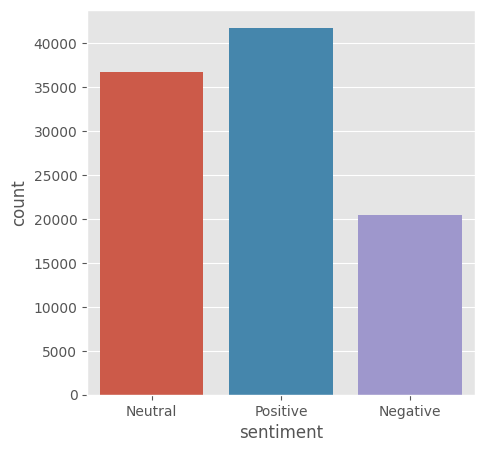

In [76]:
fig = plt.figure(figsize=(5,5))
graph=sns.countplot(x='sentiment', data = text_df)

In [77]:
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()
logging.info("Positive tweets dataframe created successfully.")

In [78]:
neg_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()
logging.info("Negative tweets dataframe created successfully.")

In [79]:
neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()
logging.info("Neutral tweets dataframe created successfully.")

In [80]:
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['tweet'])


In [81]:
X = text_df['tweet']
Y = text_df['sentiment']
X = vect.transform(X)

In [82]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
logging.info("Dataframe divided into train and test successfully.")

In [83]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (79173, 586548)
Size of y_train: (79173,)
Size of x_test: (19794, 586548)
Size of y_test: (19794,)


In [84]:
import warnings
warnings.filterwarnings('ignore')

In [85]:
from sklearn.svm import LinearSVC

In [86]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [87]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))
logging.info("Module got test accuracy of  {:.2f}%".format(svc_acc*100))

test accuracy: 96.19%


In [88]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[3748  159  166]
 [  66 7252   69]
 [ 136  159 8039]]


              precision    recall  f1-score   support

    Negative       0.95      0.92      0.93      4073
     Neutral       0.96      0.98      0.97      7387
    Positive       0.97      0.96      0.97      8334

    accuracy                           0.96     19794
   macro avg       0.96      0.96      0.96     19794
weighted avg       0.96      0.96      0.96     19794



In [89]:
from sklearn.pipeline import Pipeline

pipeline=Pipeline([('vect',vect),('SVCmodel',SVCmodel)])

In [90]:
import joblib 
joblib.dump(pipeline,'SentiAnlsModel3.pkl')
logging.info("PKL file created successfully.")

In [91]:
load_model3=joblib.load('SentiAnlsModel3.pkl')

In [92]:
pred=pipeline.predict(["is rishi sunak going to be britains next prime minister ?"])
print(pred)

['Neutral']


In [93]:
print(x_test)

  (0, 32786)	1
  (0, 32817)	1
  (0, 87725)	1
  (0, 87780)	1
  (0, 100348)	1
  (0, 100351)	1
  (0, 106456)	1
  (0, 106468)	1
  (0, 133329)	1
  (0, 233845)	1
  (0, 233904)	1
  (0, 325761)	1
  (0, 325762)	1
  (0, 545468)	1
  (0, 545491)	1
  (0, 563386)	1
  (0, 564034)	1
  (0, 571289)	1
  (0, 571431)	1
  (1, 70262)	1
  (1, 70384)	1
  (1, 96425)	1
  (1, 96426)	1
  (1, 140623)	1
  (1, 140635)	1
  :	:
  (19792, 392980)	3
  (19792, 393102)	1
  (19792, 393139)	1
  (19792, 393158)	1
  (19792, 420669)	1
  (19792, 420679)	1
  (19792, 443958)	1
  (19792, 443988)	1
  (19792, 444279)	1
  (19792, 444281)	1
  (19792, 467644)	1
  (19792, 467661)	1
  (19792, 581883)	1
  (19792, 581964)	1
  (19793, 39904)	1
  (19793, 179396)	1
  (19793, 179786)	1
  (19793, 287789)	1
  (19793, 287822)	1
  (19793, 369882)	1
  (19793, 370016)	1
  (19793, 460075)	1
  (19793, 460200)	1
  (19793, 469324)	1
  (19793, 469326)	1


In [94]:
text_df.head()

,tweet,polarity,sentiment
0,lying hotel bed watching office,0.0,Neutral
1,good toothpaste,0.7,Positive
2,good day,0.7,Positive
3,dont want wake amazingphoebe miss heaps,0.0,Neutral
4,terrinixon hoping make laugh,0.3,Positive


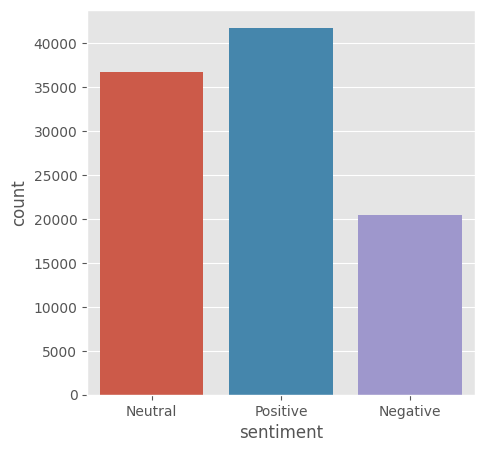

In [95]:

fig = plt.figure(figsize=(5,5))
graph=sns.countplot(x='sentiment', data = text_df)